# Pandas 3
## – ファイルを読み込んでデータフレームを作成 –  

被験者を開眼・開脚で(静止)立位で重心動揺計のプレートの上に立たせ，30秒間100HzでCOP（圧力中心$\simeq$身体重心の水平面への垂線の足）を計測したデータを例にする。

### 0. パッケージのインポート

PandasとNumPyをそれぞれ`pd`と`np`でインポートしておこう：

In [1]:
import pandas as pd
import numpy as np

### 1. たちの良いCSVファイルを読み込む

表計算ソフト(ここではApple Numbers)で開くと図1のように開くデータファイル（`cop_clean.csv`）を読み込む。ただし，このファイルは実際には，**データがコンマで区切られたテキストデータ**ファイルでこのようなファイルを**CSVファイル**いう。CSVファイルをテキストエディターで開くと，図2のように表示される。  

<br>
<img src="./figs/fig1.png" width=500>
<br>
<center><b>図1.データのCSVファイルをNumbersで開いた例</b></center>
<br>
<br>
<img src="./figs/fig2.png" width="300">
<br>
<center><b>図2.データのCSVファイルをテキストエディターで開いた例（その１）</b></center>
<br>

このCSVファイル（cop_clean.csv）は非常にたちが良い。**余計な行や列がなく**，文字コードが**UTF-8**だからだ。

#### 1-1. 読み込み

教科書p.244のリスト6-23のとおり`pd.read_csv`関数を用いて，`df1`にCSVファイル`cop_clean.csv`を読み込んでみよう。

In [2]:
df1 =  pd.read_csv('cop_clean.csv')

#### 1-2. データフレーム

1-1の方法で読み込んだデータは，データフレームオブジェクトとして`df1`に生成される。`df1`を表示してみよう：

In [3]:
df1

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf)
0,0.00,-2.325,-7.519,-20.338,-7.435,24.908,17.080,-7.609,23.121
1,0.01,-2.329,-7.528,-20.336,-7.446,24.937,17.058,-7.617,23.160
2,0.02,-2.317,-7.548,-20.330,-7.453,24.947,17.060,-7.649,23.190
3,0.03,-2.292,-7.528,-20.330,-7.453,24.947,17.064,-7.609,23.248
4,0.04,-2.289,-7.535,-20.330,-7.453,24.947,17.053,-7.624,23.268
...,...,...,...,...,...,...,...,...,...
2996,29.96,-2.264,-7.593,-20.349,-7.432,24.917,17.062,-7.765,23.317
2997,29.97,-2.293,-7.595,-20.359,-7.430,24.927,17.037,-7.771,23.297
2998,29.98,-2.273,-7.588,-20.366,-7.423,24.917,17.062,-7.765,23.317
2999,29.99,-2.263,-7.586,-20.366,-7.423,24.917,17.075,-7.762,23.326


> しかし，世の中そんなに甘くはない。特に計測器で計測しCSVデータに書き出されたデータはその計測器のメーカーの好き勝手な仕様によって異なるからだ。

### 2. 実際の(たちの悪い)CSVファイルの読み込み

セクション1で読み込んだデータファイル（`cop-real.csv`）は，**重心動揺計が出力するデータ(CSV)ファイル**を加工している。加工前の**生のデータファイル**をダブルクリックするとExcelで図3のように開く。しかし，Excelでダブルクリックで開くCSVファイル，それがもしかな漢字等の日本語を含んでいると**たちが悪い**んだ。そのことをみてみよう。
<br>
<img src="./figs/fig3.png" width=400>
<br>
<center><b>図3.データのCSVファイルをExcelで開いた例</b></center>
<br>


#### 2-1. 読み込みエラー続出！
##### 2-1-1. 文字コードエラー

生データファイル`cop_real.csv`をセクション1と同様に読み込んで，データフレームオブジェクト`df2`を作成したい。やってみよう：

In [4]:
df = pd.read_csv('cop_real.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x94 in position 2: invalid start byte

> エラーだ！しかも訳がわからない`UnicodeDecodeError`。なんだこれ？…こんな旨が書いてある「'utf-8'の文字列として読み込もうとしたんだが，位置2のバイト値`0x94`が解釈できん」。

`cop_real.csv`ファイルを図2と同じテキストエディターで開いてみたのが図4だ。「これに注意」のところが，`cop_clean.csv`では**UTF-8**になっているのに対し（図2），`cop_real.csv`では**Shift_JIS**になっている（図4）。ここがまず，たちが良いか悪いかの違いだ。現在**世界で標準的に使われている文字コードはUTF-8(ユニコードの一種)**であるのに対し，Shiht-JISという文字コードは古臭いレガシーな日本語文字コードなんだ。Shift_JISは世界標準でもないし，日本標準ですらない，実はつい最近までマイクロソフト社標準の日本語文字コードなんだ。現在「こんな文字コードは使うのやめようや！」$^*$ってことになってるのに，重心動揺計はそれをまだ使ってる，なんてこった！って感じだな。  
<br>
<br>
<img src="./figs/fig4.png" width="600">
<br>
<center><b>図4.データのCSVファイルをテキストエディターで開いた例（その２）</b></center>
<br>

> $^*$悲しいことに，マイクロソフト社はShift_JISの呪縛からまだ抜け出せれないでいるようだ。その証拠に，上でやったようにダブルクリックでExcelで開くCSVファイルは，Shift_JISのはちゃんと表示できるが，UTF-8のは字化けする。しかし，ExcelのバイナリファイルはUTF-8を使っている。こんな混乱が起きている。

##### 2-1-2. パースエラー

`pd.read_csv`関数は**文字コードの指定が特に記述されていないとき（すなわちデフォルトで），読み込み先のCSVファイルをUTF-8の文字コード**で記述されていると思い込んでいる。だから，UTF-8で解釈できない文字コードがあったときに`UnicodeDecodeError`を出し，読み込みを止める。したがって，読み込み先のCSVファイルが**UTF-8以外のときは，そのファイルの文字コードが何かを指定**すればよい。

<center><b>リスト1．UTF-8以外の文字コードのCSVファイルの読み込み</b></center>

***

```
pd.read_csv('ファイル名', encoding='読み込むファイルの文字コード')
```

***

これで，`cop_real.csv`を読み込んで，`df2`に格納してみよう：

In [5]:
df2 = pd.read_csv("cop_real.csv", encoding="shift_jis")

ParserError: Error tokenizing data. C error: Expected 4 fields in line 7, saw 13


> またエラーだ。本当に**重心動揺計のCSVファイルはたちが悪い！ **今度は`ParserError`（構文解析エラー）で，まあ簡単にいえば，「項目が4つだと思っていたのに，上から７ライン目にデータが13あるじゃないか！」というやつだ。図4を見ると，たしかに**個人の基本データ**が4列(7行)の別の表があって，そこから13列の**計測データ**になっている。**7行(indexでいうと0〜6行目)の「個人の基本データ」が要らないんだ**。

<center><b>リスト2．不必要な行(indexで0〜n行)を読み飛ばしてCSVファイルを読み込む</b></center>

***
```
pd.read_csv('ファイル名', skiprows=n)
```
***

#### 2-2. 重心動揺計CSVファイルの読み込み成功

リスト1とリスト2のオプションを兼ね合わせて`cop_real.csv`を読み込んでみる：  
> ```
pd.read_csv('ファイル名', encoding='読み込むファイルの文字コード', skiprows=読み飛ばしたい行数)
```

In [6]:
df2 = pd.read_csv('cop_real.csv', encoding='shift_jis', skiprows=6)

エラーはでない。`df2`を表示してみよう。

In [7]:
df2

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf),Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.00,-2.396,0.138,-18.508,-1.126,34.677,17.991,1.736,27.406,NaN,NaN,NaN,NaN
1,0.01,-2.411,0.130,-18.516,-1.139,34.716,17.991,1.736,27.406,NaN,NaN,NaN,NaN
2,0.02,-2.408,0.149,-18.508,-1.123,34.765,17.987,1.760,27.445,NaN,NaN,NaN,NaN
3,0.03,-2.418,0.149,-18.512,-1.116,34.755,17.991,1.754,27.406,NaN,NaN,NaN,NaN
4,0.04,-2.423,0.161,-18.512,-1.116,34.755,18.016,1.784,27.357,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,29.96,-2.712,-0.201,-18.500,-1.333,35.136,17.949,1.281,26.850,NaN,NaN,NaN,NaN
2997,29.97,-2.715,-0.189,-18.500,-1.333,35.136,17.964,1.310,26.820,NaN,NaN,NaN,NaN
2998,29.98,-2.714,-0.185,-18.500,-1.333,35.136,17.959,1.319,26.830,NaN,NaN,NaN,NaN
2999,29.99,-2.720,-0.177,-18.504,-1.326,35.156,17.954,1.327,26.840,NaN,NaN,NaN,NaN


> 一応，重心動揺計のデータを読み込めた。しかし，このデータフレーム`df2`は不必要な列があるし，項目名が日本語であるのでデータ分析に向いていない（できないことはないが…）。

#### 2-3. データフレームの整形

データフレーム`df2`から種々のデータ分析をしやすいように整形しよう。教科書p.225〜226の**データフレームオブジェクトに対する`iloc`属性**を使う。`df2`において，行は全て必要であるが，列は1〜8列目しか必要ない。`iloc`属性で取り出したい行を指定する場合には**スライス**を用いるのだから，このことに注意して`df2`を置き換える：

In [8]:
df2 = df2.iloc[:, :9]

`df2`を表示してみよう：

In [9]:
df2

,時間(秒),総合COP左右X(cm),総合COP前後Y(cm),左プレートCOP左右X(cm),左プレートCOP前後Y(cm),左荷重(kgf),右プレートCOP左右X(cm),右プレートCOP前後Y(cm),右荷重(kgf)
0,0.00,-2.396,0.138,-18.508,-1.126,34.677,17.991,1.736,27.406
1,0.01,-2.411,0.130,-18.516,-1.139,34.716,17.991,1.736,27.406
2,0.02,-2.408,0.149,-18.508,-1.123,34.765,17.987,1.760,27.445
3,0.03,-2.418,0.149,-18.512,-1.116,34.755,17.991,1.754,27.406
4,0.04,-2.423,0.161,-18.512,-1.116,34.755,18.016,1.784,27.357
...,...,...,...,...,...,...,...,...,...
2996,29.96,-2.712,-0.201,-18.500,-1.333,35.136,17.949,1.281,26.850
2997,29.97,-2.715,-0.189,-18.500,-1.333,35.136,17.964,1.310,26.820
2998,29.98,-2.714,-0.185,-18.500,-1.333,35.136,17.959,1.319,26.830
2999,29.99,-2.720,-0.177,-18.504,-1.326,35.156,17.954,1.327,26.840


> うまくいった（だろ？）。しかし，項目名が長すぎるし日本語だから分析の際使いにそうだな。

データフレーム`df2`の`columns`属性を以下のように変更しよう（教科書p.220〜221 リスト6-5）：  
```
時間(秒) → t
総合COP左右X(cm) → x
総合COP前後Y(cm) → y
左プレートCOP左右X(cm) → x_L
左プレートCOP前後Y(cm) → y_L
左荷重(kgf) → load_L
左プレートCOP左右X(cm) → x_R
左プレートCOP前後Y(cm) → y_R
左荷重(kgf) → load_R
```

In [10]:
df2.columns=['t', 'x', 'y', 'x_L', 'y_L', 'load_L',  'x_R', 'y_R', 'load_R']

`df2`を表示してみよう：

In [11]:
df2

,t,x,y,x_L,y_L,load_L,x_R,y_R,load_R
0,0.00,-2.396,0.138,-18.508,-1.126,34.677,17.991,1.736,27.406
1,0.01,-2.411,0.130,-18.516,-1.139,34.716,17.991,1.736,27.406
2,0.02,-2.408,0.149,-18.508,-1.123,34.765,17.987,1.760,27.445
3,0.03,-2.418,0.149,-18.512,-1.116,34.755,17.991,1.754,27.406
4,0.04,-2.423,0.161,-18.512,-1.116,34.755,18.016,1.784,27.357
...,...,...,...,...,...,...,...,...,...
2996,29.96,-2.712,-0.201,-18.500,-1.333,35.136,17.949,1.281,26.850
2997,29.97,-2.715,-0.189,-18.500,-1.333,35.136,17.964,1.310,26.820
2998,29.98,-2.714,-0.185,-18.500,-1.333,35.136,17.959,1.319,26.830
2999,29.99,-2.720,-0.177,-18.504,-1.326,35.156,17.954,1.327,26.840


### 3. 種々の分析

#### 3-1. 統計的要約

教科書p.230のように，`Series`オブジェクトについて基本統計量を計算できる。しかし，同様の統計量をもっと簡単で一挙に計算できてデータフレームにしてしまうもっといい(と思う)データフレームに対するメソッドがある：

<br>
<center><b>リスト3．データフレームの要約統計量を得る：</b>結果は各項目に対する基本統計量のデータフレームを返す</center>

***
```
データフレームオブジェクト.describe()
```
***

`df2`に`describe`メソッドを作用させて，生成されたデータフレームオブジェクトを`df2_des`に格納しよう：

In [12]:
df2_des = df2.describe()

`df2_des`を表示してみよう：

In [13]:
df2_des

,t,x,y,x_L,y_L,load_L,x_R,y_R,load_R
count,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,15.000000,-2.564552,0.066591,-18.519738,-0.953069,34.899861,17.962340,1.378754,27.127223
std,8.664584,0.084163,0.317420,0.015859,0.366679,0.143939,0.024758,0.278279,0.146651
min,0.000000,-2.825000,-0.876000,-18.564000,-2.037000,34.453000,17.891000,0.564000,26.576000
25%,7.500000,-2.616000,-0.177000,-18.532000,-1.214000,34.814000,17.946000,1.187000,27.035000
50%,15.000000,-2.573000,0.118000,-18.524000,-0.872000,34.902000,17.959000,1.392000,27.113000
75%,22.500000,-2.521000,0.283000,-18.512000,-0.693000,34.990000,17.976000,1.539000,27.211000
max,30.000000,-2.287000,0.661000,-18.464000,-0.273000,35.341000,18.046000,2.068000,27.611000


> おお，すごい！

上のデータフレームの　index　に示されている事項の意味は下の表1に示すとおりである。  

<br>
<center><b>表1：要約統計量データフレームにおける量の意味</b></center>

| index | 意味 |
|:-:|:-:|
| count | 要素数 |
| mean | 平均 |
| std | 標準偏差 |
| min | 最小値 |
| 25% | 第１四分位数 |
| 50% | 中央値(第２四分位数) |
| 75% | 第３四分位数 |
| max | 最大値 |

`df2_des`はデータフレームであるから，１つの項目のある統計量を取り出せる。例えば，`x_L`（`左プレートCOP左右X(cm)` ）の第３四分位数は，以下のようにして取り出せる（教科書p.220の1行目〜5行目を参照…ただし，index番号は`'count'`, `'mean'`, ..., `'max'`と読み替えよ）：

In [14]:
df2_des['x_L']['75%']

-18.512

#### 3-2. ヒストグラムと箱ひげ図

Pandasはデータフレームに対して，ヒストグラムと箱ひげ図を描くメソッドを持っている。

##### 3-2-1. ヒストグラム

<center><b>リスト4. データフレームのデータに対してヒストグラムを描く</b></center>

***
```
データフレームオブジェクト.hist(...)
```
※）引数の...にはオプション引数（キーワード引数）が入る。とりあえず重要なオプション引数はfigsizeとcolumn。
***

さて，`df2`の全てのデータについてのヒストグラムを描いてみる：  
> 余計な出力を抑えるためにコマンドの最後に`;`を入れておく。

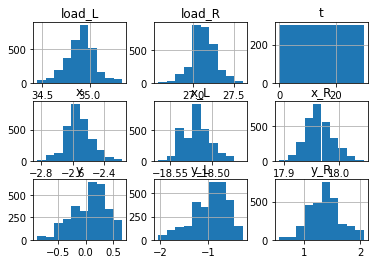

In [15]:
df2.hist();

> 小さすぎる。

オプション（キーワード）引数`figsize`を`(10, 10)`としてみる：

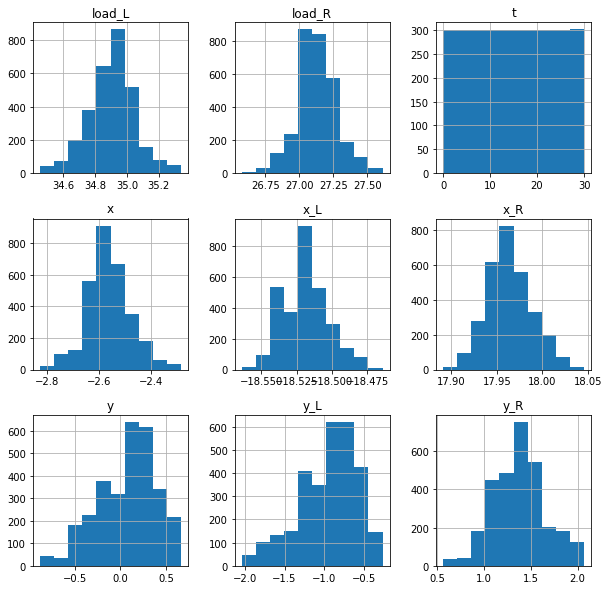

In [16]:
df2.hist(figsize=(10,10));

> おおお，すばらしい！（項目`t`のヒストグラムは意味がない）。

１つの項目だけのヒストグラムを描くときは，`column`オプション(キーワード)引数を使う。例えば，項目`x_L`のヒストグラムだけ描きたいときは：

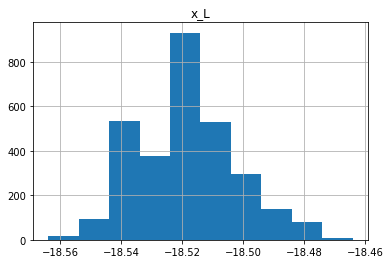

In [17]:
df2.hist(column='x_L');

複数の項目のヒストグラムを描くときは，columnオプション(キーワード)引数の右辺をリストにしておく。例えば，`y_L`, `y_R`のヒストグラムを描くときは：  
> １つのグラフが細くなるので，`figsize`オプションで調整する。

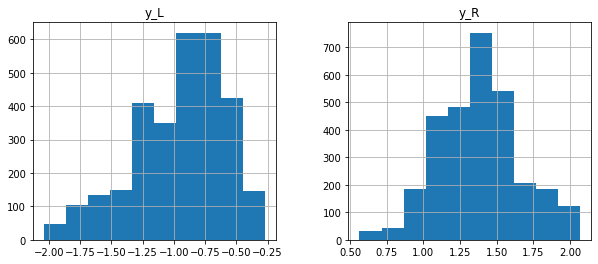

In [18]:
df2.hist(column=['y_L', 'y_R'], figsize=(10,4));

> すばらしい！

##### 3-2-2. 箱ひげ図

<center><b>リスト5. データフレームのデータに対して箱ひげ図を描く</b></center>

***
```
データフレームオブジェクト.boxplot(...)
```
※）引数の...にはオプション引数（キーワード引数）が入る。とりあえず重要なオプション引数はfigsizeとcolumn。
***

基本的な使い方は`hist`メソッドと同じ。df2のデータすべてのデータについての箱ひげ図は：  
> `figsize=(10,6)`とする。

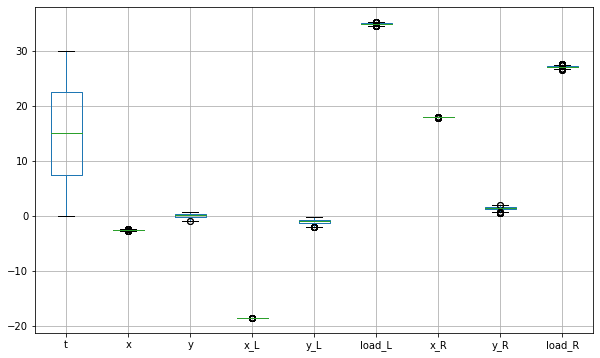

In [19]:
df2.boxplot(figsize=(10,6));

項目`x_L`の箱ひげ図だけ描きたいときは：

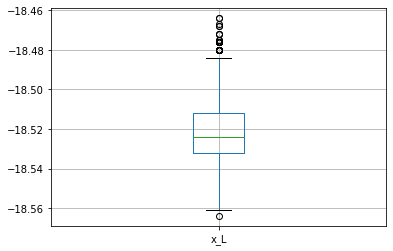

In [20]:
df2.boxplot(column='x_L');

`y_L`, `y_R`の箱ひげ図を描くときは：

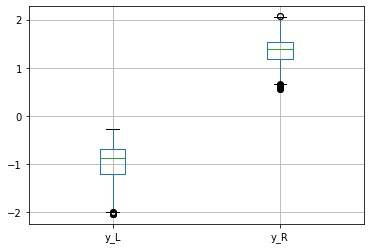

In [21]:
df2.boxplot(column=['y_L', 'y_R']);

> すばらしい！

#### 3-3. COPの総軌跡長を求める

COPの総軌跡長を求めてみよう。NumPyを使う。次の重要な関数が必要だ：  

<br>
<center><b>リスト6. NumPyやPandas Seriesの差分を求める関数</b></center>

***
$n$個の要素をもつ１次元ndarrayまたはPandas Seriesを`arr`とし，`arr`のindex $i$の要素($i = 0, 1, 2, ... , n$)を$a_i$とする。

<center>
    
```
np.diff(arr)
```
    
</center>

は，$a_1-a_0, a_2-a_1, ... a_i-a_{i-1}, a_{i+1}-a_i, ... a_n-a_{n-1}$をもつ($n-1$個の要素をもつ)１次元ndarrayを返す。

***

`dx`を`df2[x]`の，`dy`を`df2[y]`の要素の差分変数とすると：

In [22]:
dx = np.diff(df2['x'])
dy = np.diff(df2['y'])

このとき，$i$番目と$i+1$番目のCOPの間の距離のnp.array配列`ds`は：

> 中学の復習。ただし，ndarray `arr`の各要素の平方根は`np.sqrt(arr)`で求めることができる。

In [23]:
ds = np.sqrt(dx**2 + dy**2)

`ds`のすべての要素を足し合わせたものが総軌跡長`s`なのだから（教科書p.128 リスト3-20を参照）：

In [24]:
s = np.sum(ds)
print(s)

39.02421522800696


> この人のCOPの総軌跡長はおよそ40cmである。